## Import Libraries

In [1]:
#Importing libraries
from PIL import Image
import numpy as np
import sys
import os
import csv
from keras.models import Sequential
from sklearn import preprocessing
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## Data Pre-Processing

In [2]:
# Converting all the images from JPG to CSV
filelist = []
for path in [x[0] for x in os.walk('D:/thesis_dataset/')][1:]:
    label = os.path.basename(path)
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:

            if name.endswith('.jpg'):
                fullName = os.path.join(root, name)
                filelist.append([fullName,label])
row = []
for file,label in filelist:
 
    print(file)
    img_file = Image.open(file)
    

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int64).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    row.append([value,label])

D:/thesis_dataset/Abdoulaye_Wade\Abdoulaye_Wade_0001.jpg
D:/thesis_dataset/Abdoulaye_Wade\Abdoulaye_Wade_0002.jpg
D:/thesis_dataset/Abdoulaye_Wade\Abdoulaye_Wade_0003.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0001.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0002.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0003.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0004.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0005.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0006.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0007.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0009.jpg
D:/thesis_dataset/Adrien_Brody\Adrien_Brody_0011.jpg
D:/thesis_dataset/John_McCain\John_McCain_0001.jpg
D:/thesis_dataset/John_McCain\John_McCain_0002.jpg
D:/thesis_dataset/John_McCain\John_McCain_0005.jpg
D:/thesis_dataset/John_McCain\John_McCain_0006.jpg
D:/thesis_dataset/John_McCain\John_McCain_0007.jpg
D:/thesis_dataset/Paradorn_Srichaphan\Paradorn_Srichaphan_0001.jpg
D:/thesis_dataset/Paradorn_Sri

In [3]:
# Display the images in the dataframe
labels = []
arrays2 = []
for arr in row:
    labels.append(arr[1])
    arrays2.append(arr[0])
df = pd.DataFrame(arrays2)
df['label'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,label
0,214,214,213,213,213,214,215,215,218,218,...,53,59,58,54,6,2,1,1,1,Abdoulaye_Wade
1,45,47,48,48,49,50,51,51,52,55,...,34,34,34,34,34,0,1,0,0,Abdoulaye_Wade
2,1,1,1,1,1,0,0,0,0,0,...,45,1,0,0,1,0,0,0,1,Abdoulaye_Wade
3,0,0,0,0,0,0,0,0,7,7,...,50,53,53,52,52,1,0,0,1,Adrien_Brody
4,108,105,99,93,87,79,69,61,54,50,...,47,49,51,56,60,65,69,79,76,Adrien_Brody


In [4]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,label
28,0,0,0,0,0,0,0,0,0,0,...,6,6,5,5,6,6,4,1,1,Unknown
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Unknown
30,4,6,8,6,5,6,9,11,8,9,...,1,1,0,1,2,1,0,0,0,Unknown
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Unknown
32,0,0,0,0,0,3,6,6,7,7,...,0,0,0,0,0,0,0,0,0,Unknown


In [5]:
#Save the dataframe
df.to_csv('D:/thesis_dataset/ultimate_test.csv')

## Exploratory Data Analysis

In [6]:
#Encode the label column
pixels = df.drop(["label"],axis=1)
label = df["label"]
le = preprocessing.LabelEncoder()
encoded_label = le.fit_transform(label)

In [7]:
le.classes_

array(['Abdoulaye_Wade', 'Adrien_Brody', 'John_McCain',
       'Paradorn_Srichaphan', 'Unknown'], dtype=object)

In [8]:
print (pixels)

    0      1      2      3      4      5      6      7      8      9      ...  \
0     214    214    213    213    213    214    215    215    218    218  ...   
1      45     47     48     48     49     50     51     51     52     55  ...   
2       1      1      1      1      1      0      0      0      0      0  ...   
3       0      0      0      0      0      0      0      0      7      7  ...   
4     108    105     99     93     87     79     69     61     54     50  ...   
5       0      0      0      0      0      0      1      1      0      0  ...   
6       1      1      0      0      0      0      1      1      1      1  ...   
7       1      1      1      0      0      0      0      0      0      0  ...   
8       0      0      0      0      0      0      0      0      0      0  ...   
9       0      0      0      0      0      0      0      0      0      3  ...   
10    242    242    242    242    243    243    243    243    242    242  ...   
11      0      0      0     

In [9]:
print (encoded_label)

[0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4]


In [10]:
#Function to display the images using the points in each column
def show_images(pixels):
    fig, axes = plt.subplots(5, 6, figsize=(11, 7), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(250, 250), cmap='gray')
    plt.show()

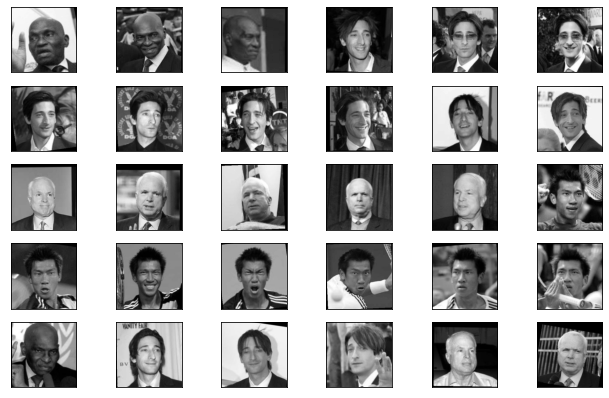

In [11]:
show_images(pixels)

## Splitting the dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(pixels, encoded_label)

In [13]:
x_train.shape

(24, 62500)

In [14]:
x_test.shape

(9, 62500)

In [15]:
y_train.shape

(24,)

In [16]:
y_test.shape

(9,)

## Feature Extraction

### PCA 

In [17]:
#Standard Scaling
scaler = StandardScaler()
scaler.fit(x_train)
X_sc_train = scaler.transform(x_train)
X_sc_test = scaler.transform(x_test)

In [18]:
# Extracting feature using PCA
NCOMPONENTS = 15

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)
print(y_train.shape)
Y_train = y_train.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
print(Y_train)

(24, 62500)
(24, 15)
(24,)
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


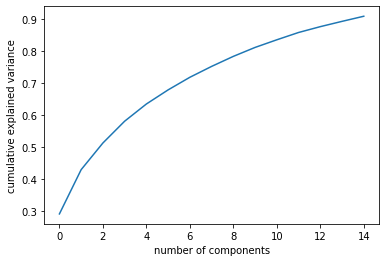

In [19]:
#pca = PCA(n_components=NCOMPONENTS, svd_solver='full').fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [20]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3, 5, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(250, 250), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

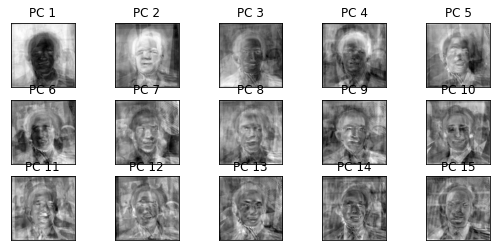

In [21]:
show_eigenfaces(pca)

### Fisherface

In [22]:
#Extracting feature using LDA
lda = LDA(n_components=3)

X_lda_train = lda.fit_transform(X_pca_train,y_train)
X_lda_test = lda.transform(X_pca_test)
lda_std = np.std(X_lda_train)
print(X_sc_train.shape)
print(X_lda_train.shape)
print(y_train.shape)
Y_train = y_train.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
print(Y_train)

(24, 62500)
(24, 3)
(24,)
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


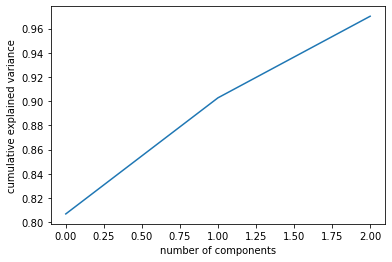

In [23]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

### Model Training Using CNN

### Training for PCA

In [24]:
model = Sequential()
layers = 1
units = 128
pca_std = np.std(X_pca_train)
#Dense layer with 128 neurons
model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
#regularisation layer
model.add(GaussianNoise(pca_std))

#We are adding only 1 set of layer with 128Neurons 
for i in range(layers):
    #Dense layer
    model.add(Dense(units, activation='relu'))
    #Both below for regularisation
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))

#Output layer ; 5 because there are only 5 labels, "softmax" is used because it has multiple labels.
model.add(Dense(5, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

history = model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
gaussian_noise (GaussianNois (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 19,205
Trainable params: 19,205
Non-trainable params: 0
____________________________________________________

### Prediction using PCA with CNN

In [25]:
predictions = model.predict_classes(X_pca_test, verbose=0)
predictions1 = le.inverse_transform(predictions)
print(classification_report(y_test,predictions))

def write_predictions(predictions1, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions1)+1)), "Label": predictions1}).to_csv(fname, index=False, header=True)

write_predictions(predictions1, "pca-keras-mlp.csv")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      1.00      0.57         2
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         4

    accuracy                           0.44         9
   macro avg       0.23      0.50      0.31         9
weighted avg       0.20      0.44      0.28         9



C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training for FisherFace

In [26]:
model = Sequential()
layers = 1
units = 128
lda_std = np.std(X_lda_train)
model.add(Dense(units, input_dim=3, activation='relu'))
model.add(GaussianNoise(lda_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(lda_std))
    model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])
history = model.fit(X_lda_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               512       
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 17,669
Trainable params: 17,669
Non-trainable params: 0
__________________________________________________

### Prediction using Fisherface using CNN

In [27]:
predictions = model.predict_classes(X_lda_test, verbose=0)
predictions1 = le.inverse_transform(predictions)
print(classification_report(y_test,predictions))

def write_predictions(predictions1, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions1)+1)), "Label": predictions1}).to_csv(fname, index=False, header=True)

write_predictions(predictions1, "lda-keras-mlp.csv")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.29      1.00      0.44         2
           4       0.00      0.00      0.00         4

    accuracy                           0.33         9
   macro avg       0.26      0.40      0.29         9
weighted avg       0.17      0.33      0.21         9



C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MuZ\anaconda3\lib\site-packages\sklearn\metrics\_classificat